In [57]:
import matplotlib.pyplot as plt
from functions.import_dataset import *
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report
from sklearn.neighbors import KNeighborsClassifier

In [58]:
x_train, y_train, x_test, y_test = imp_dataset("dataset/voice.csv")

In [59]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
knn.fit(x_train, y_train.ravel())

KNeighborsClassifier(n_neighbors=3)

In [60]:
knn_p_test = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_p_test)
print("KNN accuracy: ", knn_acc)
print("KNN classification report: \n", classification_report(y_test, knn_p_test))

KNN accuracy:  0.7345971563981043
KNN classification report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74       314
           1       0.75      0.71      0.73       319

    accuracy                           0.73       633
   macro avg       0.74      0.73      0.73       633
weighted avg       0.74      0.73      0.73       633



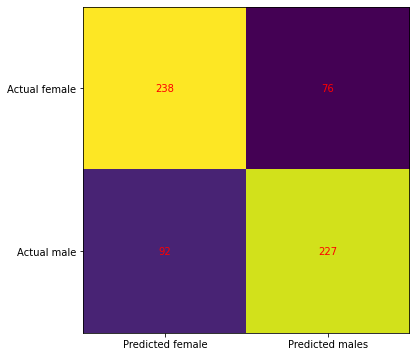

In [61]:
cm = confusion_matrix(y_test, knn.predict(x_test))

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted female', 'Predicted males'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual female', 'Actual male'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()